# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
def A(x, m=1):
    A = np.zeros((m, len(x)))
    for i in range(m):
        A[i] = x**i
    return A.T


def betta(x, y, m):
    return np.linalg.solve(A(x, m).T@A(x, m), A(x, m).T@y)


def P(x, betta):
    coef=[]
    for i in range(len(betta)):
        coef.append((betta[i] * (x ** i)))
    return sum(coef)

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [4]:
def sigma_sq(x, y, m):
    return (1/(len(x)-m))*sum((P(x, betta(x, y, m)) - y)**2)


def m_optimal():
    n = len(x)
    err = np.zeros(n)
    for m in range(n):
        err[m] = sigma_sq(x, y, m)
        if m!=0 and err[m-1]<err[m]:
            return m-1
    return n
m_opt = m_optimal()
m_opt

4

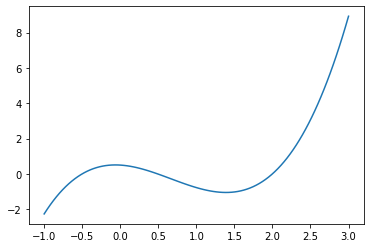

In [7]:
xx = np.linspace(x.min(), x.max(), 100)
plt.plot(xx, P(xx, betta(x, y, m_opt)))

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

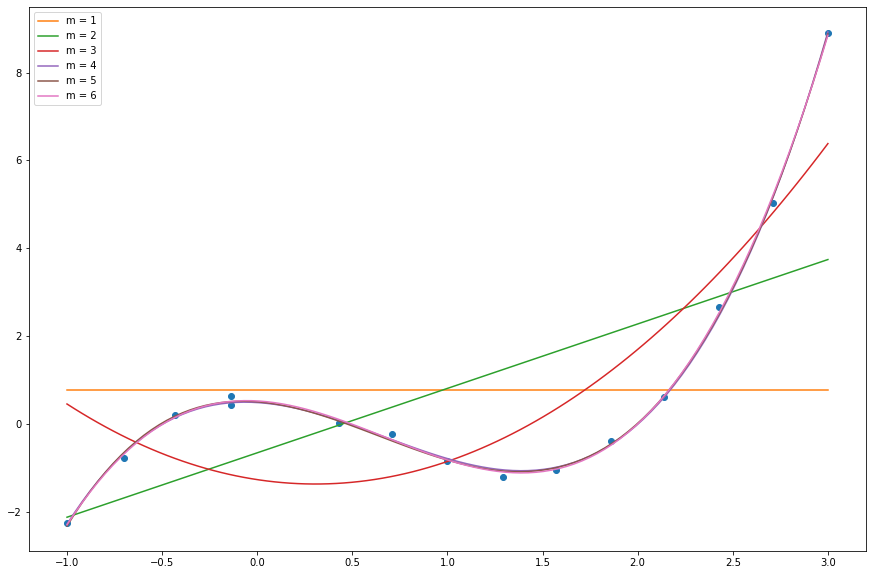

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, 'o')
for m in range(1, 7):
    plt.plot(xx, P(xx, betta(x, y, m)), label = "m = {}".format(m))
plt.legend(loc='best')

Заметим, что начиная с оптимального значения m, полиномы ведут себя почти одинаково

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

$$Ab = QRb =  y$$
$$Q^TAb = Q^Ty,\;\;Q^TQ = 1$$
$$Rb = Q^Ty$$

In [10]:
Q, R = np.linalg.qr(A(x, m_opt))
betta_qr = np.linalg.solve(R, Q.T @ y)
print(betta_qr - betta(x, y, m_opt))

[-2.42028619e-14 -1.57096558e-14  4.26325641e-14 -1.24344979e-14]


Отклонение около машинного 0, то есть факически один и тот же ответ

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [64]:
def f(x):
    return x**2*np.cos(x)


def lagrange(t, x, y):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z


x1 = np.pi/2; x2 = np.pi

def plot_P(x, f):
    xk = np.linspace(x1, x2, 100)
    yk = [lagranz(i, x, f(x)) for i in xk]
    plt.plot(xk, yk, '-', label = "m = {}".format(len(x)))
    plt.plot(x, f(x), 'o')

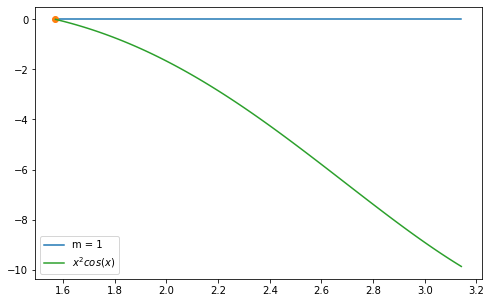

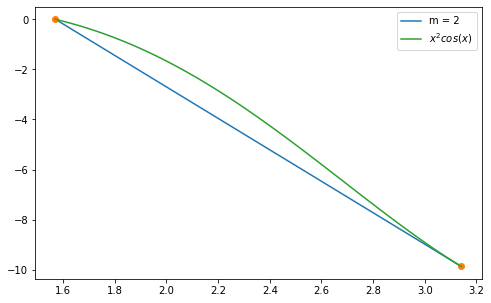

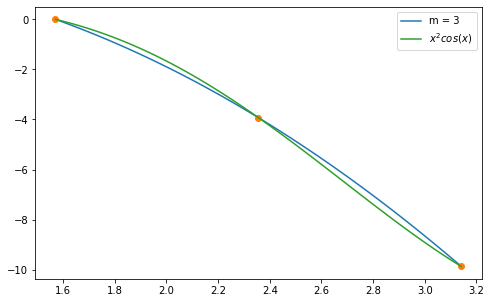

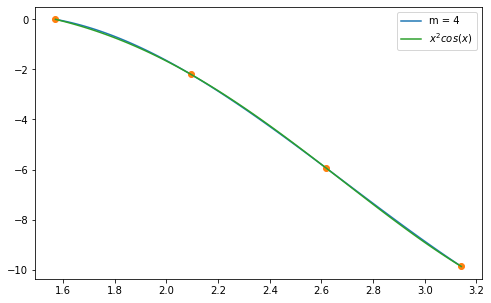

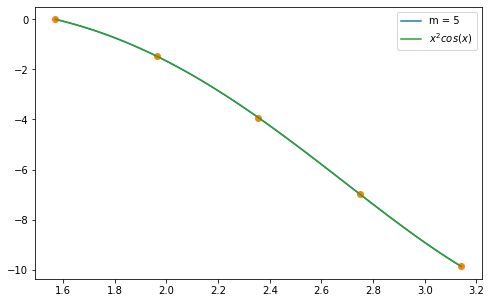

In [65]:
xxx = np.linspace(x1, x2, 100)
for m in range(1,6):
    plt.figure(figsize=(8,5))
    plot_P(np.linspace(x1, x2, m), f)
    plt.plot(xxx, f(xxx), label = "$x^2 cos(x)$")
    plt.legend()
    plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

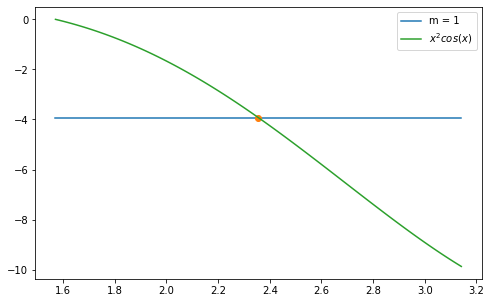

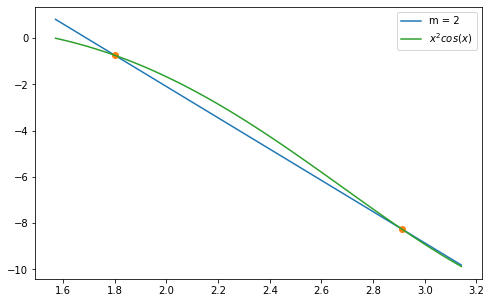

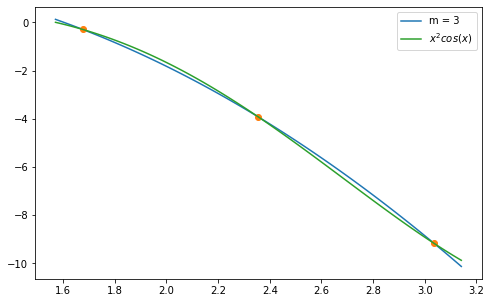

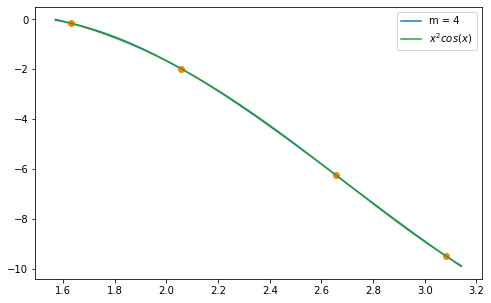

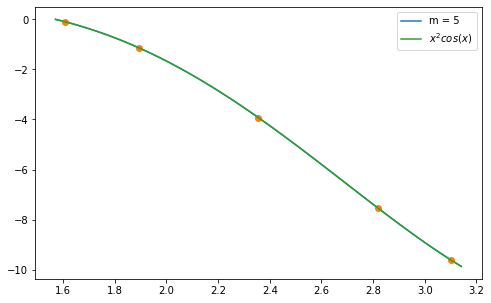

In [67]:
for m in range(1,6):
    plt.figure(figsize=(8, 5))
    x_cheb = (x1+x2)/2 + (x1-x2)*np.cos((2*np.arange(1,m+1)-1)/2/m*np.pi)/2
    plot_P(x_cheb, f)
    plt.plot(xxx, f(xxx), label = "$x^2 cos(x)$")
    plt.legend()
    plt.show()

При разбиении Чебышева интерполяционный многочлен приближается к функции быстрее, чем при равномерном разбиении